In [1]:
!pip install jovian --upgrade --quiet
!pip install requests --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet
!pip install arcgis --quiet
!pip install folium --quiet
!pip install matplotlib --upgrade --quiet
!pip install squarify --upgrade --quiet
!pip install nltk --quiet
!pip install contractions --quiet
!pip install textblob --upgrade --quiet
!pip install wordcloud --quiet


     |████████████████████████████████| 71kB 2.6MB/s 
     |████████████████████████████████| 61kB 2.5MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 122kB 4.0MB/s 
     |████████████████████████████████| 3.2MB 4.0MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
ERROR: jupyter-server 1.8.0 has requirement jupyter-client>=6.1.1, but you'll have jupyter-client 5.3.5 which is incompatible.
ERROR: jupyterlab-server 2.6.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
     |████████████████████████████████| 10.3MB 371kB/s 
ERRO

In [1]:
import jovian   #for uploading code
import requests    #to download the html page
from bs4 import BeautifulSoup    #to parse html page
import pandas as pd   #for data manipulation
import re    #for describing a search pattern
from arcgis.gis import GIS   
from arcgis.geocoding import geocode #for finding coordinates
import numpy as np   #for numerical calculations
import folium   #to visualize geospatial data
import matplotlib.pyplot as plt   #for data visualization
import squarify   #for treemap layout visualization
import seaborn as sns   #for data visualization
from datetime import datetime   #for formatting strings into date time objects
import nltk    #for nlp 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer   #for lemmatization
import contractions   #expanding and creating common English contractions in text
from textblob import TextBlob  #for processing textual data
from wordcloud import WordCloud   #for representing text data
import collections   #provides different types of containers
from nltk.util import ngrams   #to generate ngrams


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import files
files.upload()

Saving hotel_reviews.csv to hotel_reviews.csv
Saving hotels_cleaned.csv to hotels_cleaned.csv


{'hotel_reviews.csv': b'review_title,date_of_stay,review_text,rating\nThe old fashioned way,Date of stay: April 2021,"From, Aniket, Shruti and Aditya  THE GOOD -   Starting from the precheck-in experience, the sales team came across a bit difficult in being being completely transparent as in how the property is working along with its COVID-19 policies. However, The Asst. Manager sales Ms. Adrija Sen took our requests  a bit more seriously after a little persuasion wherein an upfront enthusiasm would have gone a long way to add into the experience.   Next being the actual arrival and In-house experience where the core operations took over in the 3 day and 2 night stay of our group, FO was absolutely great in accommodating requests [Ms. Ila Prabhu, Suhail, Saurabh, Khushi] and trying in their best efforts to reduce any glitches. HK might need to look into the weird dampness and stench in the Carlton Suite. F&B and Banquets and Kitchen team [Nagesh, Sunil, Murthy, Satish, Harry, Dushyant,

In [ ]:
#data = pd.read_csv('hotel_reviews.csv')
#data.head()

In [3]:
data = pd.read_csv('hotels_cleaned.csv')
data.head()

hotel_name  ...  longitude
0                            ITC Windsor, Bengaluru   ...  12.993709
1   ITC Maurya, a Luxury Collection Hotel, New Delhi  ...  28.594970
2                                     ITC Grand Goa   ...  15.340340
3  ITC Grand Bharat A Luxury Collection Retreat, ...  ...  28.477370
4                             ITC Rajputana, Jaipur   ...  26.914695

[5 rows x 13 columns]

In [4]:
data.shape

(15, 13)

In [5]:
data.isnull().sum()

hotel_name            0
hotel_rank            0
hotel_address         0
rating                0
languages_spoken      0
hotel_style           3
restaurants_nearby    1
attractions_nearby    1
no_of_rooms           0
min_price(₹)          0
max_price(₹)          0
latitude              0
longitude             0
dtype: int64

In [6]:
mapp = folium.Map(location=[data.longitude.values.mean(), data.latitude.values.mean()],zoom_start=5)
for p,q,r,s in zip(data['hotel_name'].values,data['hotel_rank'].values,data['latitude'].values,data['longitude'].values):
    folium.Marker(location = [s,r],popup=q,tooltip=p,icon=folium.Icon(color='darkred',prefix='fa',icon='circle')).add_to(mapp)
mapp


Folium library is used to locate hotels on a map. Latitudes and longitudes needed are obtained using hotel address from arcgis module

- We can zoom in and zoom out to see hotels in a specific region
- If we hover over the icons we see name of that hotel
- On clicking the icon, popup is displayed showing us the rank of hotel in that particular region

**Insights :**
  - **ITC Kohenur, Hyderabad has #1 rank out of 814 hotels in Hyderabad**
  - **11 out of 15 ITC hotels are included in top 10 hotels in their particular region**

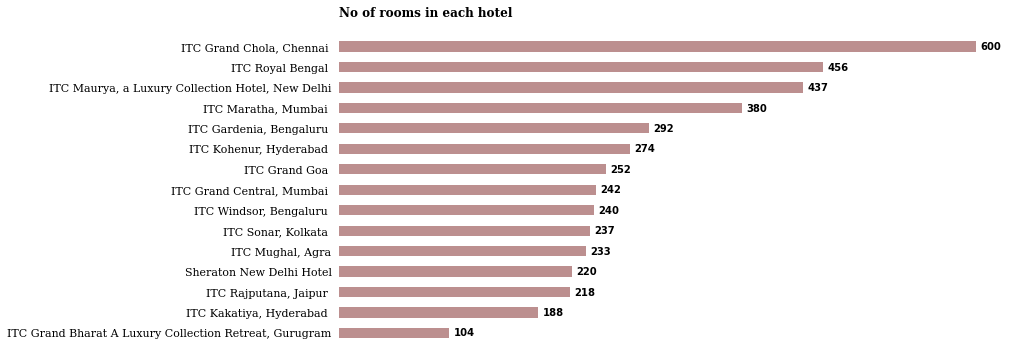

In [7]:
df = data.sort_values("no_of_rooms",ascending = False)

fig, ax = plt.subplots(figsize =(12, 6)) # fig size
plt.barh(df['hotel_name'].values,df['no_of_rooms'].values ,color='rosybrown',height = 0.5) # Horizontal Bar Plot
plt.title("No of rooms in each hotel", size=12, loc='left',pad=10,weight='bold', family='serif') # Add Plot Title
for s in ['top', 'bottom', 'left', 'right']: # Remove axes splines
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none') # Remove x,y ticks
ax.yaxis.set_ticks_position('none')
ax.get_xaxis().set_visible(False) #hide x axis
plt.yticks(size=11, family='serif') # customize yticks
for i in ax.patches:  # Add annotation to bars
    plt.text(i.get_width()+4, i.get_y()+0.4, i.get_width(), weight= 'bold')
ax.invert_yaxis();

Insights: The ITC Grand Chola in Chennai has the most rooms, while the ITC Grand Bharat in Gurugram has the least.

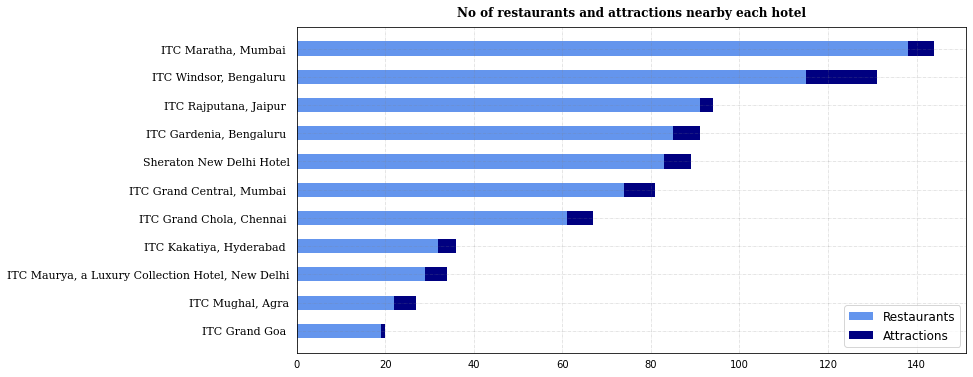

In [8]:
df= data.dropna().reset_index(drop = True)
df.sort_values(['restaurants_nearby','attractions_nearby'],ascending = False,inplace = True)

fig, ax = plt.subplots(figsize =(12, 6))
plt.barh(df['hotel_name'].values, df['restaurants_nearby'].values,height = 0.5,color='cornflowerblue')
plt.barh(df['hotel_name'].values, df['attractions_nearby'].values, left=df['restaurants_nearby'].values,height = 0.5,color='navy')
ax.invert_yaxis()
plt.title("No of restaurants and attractions nearby each hotel", size=12,pad=10, weight='bold', family='serif')
plt.yticks(size=11, family='serif')
plt.legend(['Restaurants','Attractions'],loc='best',fontsize=12)
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none');

Observations :

Mumbai's ITC Maratha has the most restaurants around.
In comparison to other hotels, ITC Windsor, Bengaluru has the most attractions around.
ITC Grand Goa offers the fewest dining options, as well as a small number of neighboring attractions.

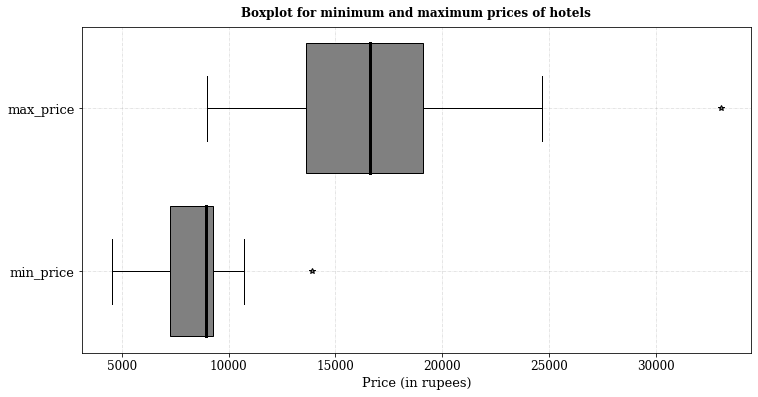

In [9]:
fig, ax = plt.subplots(figsize =(12, 6))

bp = plt.boxplot([data['min_price(₹)'].values,data['max_price(₹)'].values],patch_artist=True, vert = 0,widths=[0.8,0.8])
for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor='grey')
    bp['medians'][i].set(color ='black', linewidth = 3) 
    bp['fliers'][i].set(markerfacecolor='grey', marker='*')

plt.yticks([1,2],['min_price','max_price'],size=13, family='serif')
plt.xticks(size=12, family='serif')
plt.xlabel('Price (in rupees)',size=13, family='serif')
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.title("Boxplot for minimum and maximum prices of hotels", size=12,pad=10, weight='bold', family='serif');

Insights: - The median hotel price range is 9000-16500 dollars.
- The minimum price for an ITC hotel is $4500

- The maximum price for an ITC hotel is $33,000

In [10]:
# Categorical variables languages_spoken and hotel_style are encoded 

def encoding_cat(col_values,col):
    temp1 = []
    for i in col_values:
        temp2=[]
        for j in col:
            if j in i:
                temp2.append(1)
            else:
                temp2.append(0)
        temp1.append(temp2)
    t1= []
    for i in range(len(col)):
        t2=[]
        for j in temp1:
            t2.append(j[i])
        t1.append(t2)

    dic= {}
    for i,j in enumerate(col):
        dic[j]=t1[i]

    return pd.DataFrame(dic)

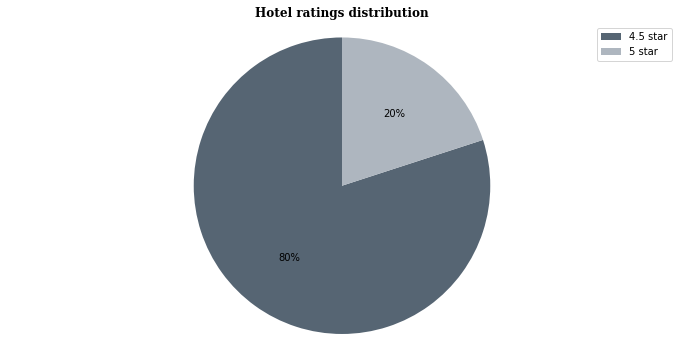

In [11]:
fig, ax = plt.subplots(figsize =(12, 6))
plt.pie(data.rating.value_counts(), autopct='%1.0f%%', startangle=90,colors =['#566573','#AEB6BF'])
plt.legend(['4.5 star','5 star'])
plt.title("Hotel ratings distribution",size=12, weight='bold', family='serif')
plt.axis('equal');

Observations :

Each hotel has received a rating of at least 4.5 out of 5 stars.
80 percent of hotels have a 4.5 star rating. A total of 20% of hotels have a 5-star rating.

**Q. Does the location, nearby attractions/restaurants, no of rooms affect the price of hotel?**

In [12]:
df= data.fillna(round(data.mean(),0))

cities = []
for i in df['hotel_rank']:
    cities.append(i.split(' ')[-1])
metro = ['Bengaluru', 'Delhi', 'Chennai', 'Mumbai', 'Hyderabad', 'Kolkata']
cat = []
for i in cities:
    if i in metro:
        cat.append('Metro')
    else:
        cat.append('Other')
        
xaxis = (df['min_price(₹)']+df['max_price(₹)'])/2
yaxis = df['restaurants_nearby']+df['attractions_nearby']

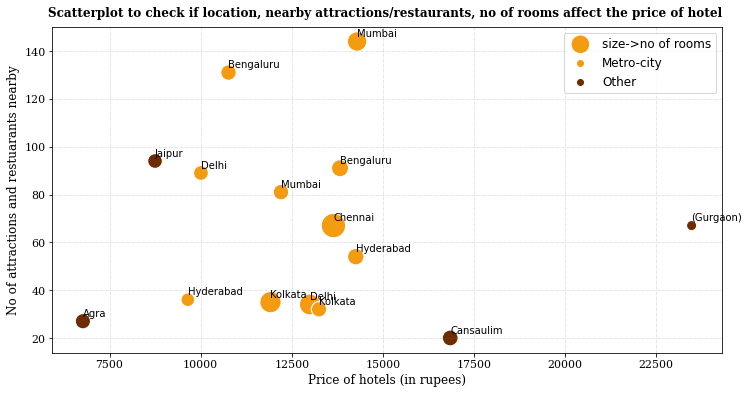

In [13]:
sns.set_palette(sns.color_palette(['#F39C12','#6E2C00']))
fig, ax = plt.subplots(figsize =(12, 6))
sns.scatterplot(y=yaxis, x=xaxis, s = df['no_of_rooms'], hue=cat)

for i in range(len(df)):
    plt.annotate(cities[i], (xaxis[i]-5, yaxis[i]+2))

plt.legend(['size->no of rooms','Metro-city','Other'],loc='best',fontsize=12);
plt.ylabel('No of attractions and restuarants nearby',size=12, family='serif')
plt.xlabel('Price of hotels (in rupees)',size=12, family='serif')
plt.title("Scatterplot to check if location, nearby attractions/restaurants, no of rooms affect the price of hotel ", size=12,pad=10, weight='bold', family='serif') 
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif');

**Insights:** 

- We don't notice any trend where hotel prices are affected by location, surrounding attractions/restaurants, or the number of rooms** 

- Hotel prices in metro cities vary less than hotel prices in non-metro cities** 

- The most economical hotel is ITC Mughal in Agra, while the most costly hotel is ITC Grand Bharat in Gurgaon.

Part 2

In [14]:
data2 = pd.read_csv('hotel_reviews.csv')
data2.head()

review_title  ...     rating
0              The old fashioned way  ...  bubble_40
1                     Birthdaycation  ...  bubble_50
2             A MEMORABLE EXPERIENCE  ...  bubble_50
3                 Treat of a Retreat  ...  bubble_50
4  Best stay I could have asked for!  ...  bubble_50

[5 rows x 4 columns]

In [15]:
data2.shape

(15020, 4)

In [16]:
data2.isnull().sum()

review_title     1
date_of_stay    80
review_text     10
rating          10
dtype: int64

In [17]:
data2.rating.value_counts()

bubble_50    13519
bubble_40      845
bubble_30      253
bubble_10      222
bubble_20      171
Name: rating, dtype: int64

In [18]:
# Before dropping null values check the values, as we have less no of negative reviews
# If randomly dropped we may miss out analyzing quality data 

data2[data2.isnull().any(axis=1)].head(50)

review_title  ...     rating
795                                       Warm service.  ...  bubble_50
796                                        Good sevinne  ...  bubble_50
797                                 Best place to spend  ...  bubble_50
798                                          Nice hotel  ...  bubble_50
799                                The service is great  ...  bubble_50
1045                                   A very good stay  ...  bubble_50
1046            Great Hotel  & maintaining it’s legacy   ...  bubble_50
1047                              Luxurious hospitality  ...  bubble_40
1048                              Not a good experience  ...  bubble_30
1049                            Short trip @ ITC Maurya  ...  bubble_50
1165                     Pathetic service average rooms  ...  bubble_10
1166                        Itc maurya sheraton , Delhi  ...  bubble_50
1167                              Best view and service  ...  bubble_40
1168                            Good setup, Small rooms  ...  bubble_30
1169                             ITC maurya is a home 🏠  ...  bubble_50
1635                       Professionalism at its best!  ...  bubble_50
1636                                           Namaste!  ...  bubble_50
1637                                  Happy family stay  ...  bubble_50
1638                                       Perfect stay  ...  bubble_50
1639                                     Beautiful stay  ...  bubble_50
1815                                            Busines  ...  bubble_50
1816                                             Royal   ...  bubble_50
1817                              ITC as my second home  ...  bubble_50
1818                                 Evergreen property  ...  bubble_50
1819                                          Nice food  ...  bubble_50
2074                                  Best stay in Goa   ...        NaN
2486                                        Outstanding  ...  bubble_50
2487                      Best that you can get at Goa.  ...  bubble_50
2488                              Excellent Hospitality  ...  bubble_50
2489                        Yes, its a GRAND experience  ...  bubble_50
2490  Thanks to the ITC Grand Goa entire team for ma...  ...  bubble_40
2561                              THE BREAK MUCH NEEDED  ...  bubble_50
2562                             Excellent stay at Goa   ...  bubble_50
2563                        excellent hotel and service  ...  bubble_50
2564                           Great Hotel for vacation  ...  bubble_50
2565                                     Fantastic stay  ...  bubble_50
2571                  Wonderful experience Royal afghan  ...  bubble_50
2572           Beautiful property & Amazing hospitality  ...  bubble_50
2573                                    ITC Hotel Royal  ...        NaN
2574                                  Afghan Restsurant  ...  bubble_50
2575               Vinod Khode Digital IT Leader in MNC  ...  bubble_50
2576                              Awesome hospitality!!  ...  bubble_50
3448  Excellent property ....  special thanks to dimple  ...        NaN
3597                             Awesomest room service  ...        NaN
3599  Excellent property with super excellent Hospit...  ...  bubble_50
3600  ITC Grand Bharat: A luxurious retreat which re...  ...  bubble_50
3601                                      Disappointed   ...  bubble_10
3602                 Memorable stay at ITC Grand Bharat  ...  bubble_50
3603                                       BJP Sanmelan  ...  bubble_50
3874             The great ITC grand Bharat experience   ...        NaN

[50 rows x 4 columns]

In [19]:
data2.dropna(inplace=True) # drop the null values as most of them were positive

In [20]:
data2["rating"]= data2["rating"].replace('bubble_10', 1)
data2["rating"]= data2["rating"].replace('bubble_20', 2)
data2["rating"]= data2["rating"].replace('bubble_30', 3)
data2["rating"]= data2["rating"].replace('bubble_40', 4)
data2["rating"]= data2["rating"].replace('bubble_50', 5)

In [21]:
data2.date_of_stay

0           Date of stay: April 2021
1           Date of stay: March 2021
2           Date of stay: March 2021
3           Date of stay: March 2021
4           Date of stay: March 2021
                    ...             
15015    Date of stay: November 2018
15016    Date of stay: November 2018
15017     Date of stay: October 2018
15018    Date of stay: November 2018
15019    Date of stay: November 2018
Name: date_of_stay, Length: 14939, dtype: object

In [22]:
data2['date_of_stay'] = data2['date_of_stay'].apply(lambda x : x.split(':')[1].strip()) #The strip() method removes whitespace by default, so there is no need to call it with parameters like '\t' or '\n'. 

In [23]:
data2['date_of_stay']

0           April 2021
1           March 2021
2           March 2021
3           March 2021
4           March 2021
             ...      
15015    November 2018
15016    November 2018
15017     October 2018
15018    November 2018
15019    November 2018
Name: date_of_stay, Length: 14939, dtype: object

In [24]:
data2['date_of_stay']

0           April 2021
1           March 2021
2           March 2021
3           March 2021
4           March 2021
             ...      
15015    November 2018
15016    November 2018
15017     October 2018
15018    November 2018
15019    November 2018
Name: date_of_stay, Length: 14939, dtype: object

In [25]:
# Converting string date into datetime and adding those features

data2['year'] = pd.DatetimeIndex(data2['date_of_stay']).year
data2['month'] =pd.DatetimeIndex(data2['date_of_stay']).month

In [26]:
data2['year']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
15015    2018
15016    2018
15017    2018
15018    2018
15019    2018
Name: year, Length: 14939, dtype: int64

In [27]:
# Text preprocessing 
def text_preprocessing(text):
    
    # custom stopwords --> removed not, nor, don't, won't from stopwords
    stopwords = ['itself', "weren't", 'been', "you'll", "can't", 'll', 'why', 'any', 'too', 'did', 'this', 'than', 'will', 
                 'i', 'which', "i'm", 'shan', 'could', "let's", 'haven', 'him', "she'd", 'for', 'his', 'at', 'had', 'she','you',
                 'were', 'your', 'own', "i've", 'it', 'my', 'those', 'and', 'if', 'yourself', 'a', 'couldn', 'once', "it's", 
                 'needn', 'isn', "you've", 'just', 'theirs', 'can', "that's", "you're", 'now', 'hasn', 't', "hadn't", "th",
                 'themselves', 'then', 'he', 'being', "he'll", 'himself', 'who', 'm', 'between', 'on', "you'd", 'ma', 'about', 
                 'didn', 'ought', 'few', 'while', 'mightn', 'mustn', 'me', 'during', 'myself', 'through', 'weren', "why's", 
                 'an', 'into', "they've", 'by', 'be', 'until', 'off', 'only', 'again', 'has', 'because', 'doing', 'does', 'in',
                 'her', 'wouldn', 'such', "i'll", 'down', "they'd", 'more', 'some', 'where', 'over', "mightn't", 'up',
                 "he's", 'hadn', 'that', 'the', 'these', 'both', 'won', "should've", "he'd", 'each', 'from', 'them', "we'd", 
                 "we'll", 'after', "how's", 'how', 'is', 're', "what's", "where's", 'hers', "she's", 'do', 'here', 'other', 
                 'so', 'yourselves', 've', 'above', 'or', 'with', "they're", 'below', 'under', 'very', 'would', 'what', 'd', 
                 'ourselves', "here's", 'am', 'whom', "that'll", "i'd", 'they', 'its', 'same', 'shouldn', "we're", 'herself', 
                 'was', 'of', "haven't", 'y', 'before', 'ours', 'o', 'have', 'there', 'when', 's', 'their', 'don', 'are', 
                 'all', 'out', 'doesn', 'to', 'ain', 'you', 'but', 'our', 'further', "who's", 'aren', 'wasn', "there's", 
                 'most', 'yours', "when's", "they'll", 'we', "needn't", 'as', 'cannot', 'should', "she'll", 'having', "we've"]

    lemmatizer = WordNetLemmatizer() 

    corpus = []
    for i in text:
        i = re.sub('[^a-zA-Z]', ' ',i) #removal of numbers and symbols(punctuation)
        i = i.lower() #convert to lowercase
        i = i.split() # split sentence review into list of words
        i = [lemmatizer.lemmatize(word) for word in i if not word in stopwords] # lemmatization and stopword removal
        i = ' '.join(i) # again join list of words into sentence
        i = contractions.fix(i) #expand contractions
        corpus.append(i)
    return corpus

In [28]:
data2['review_title'] = text_preprocessing(data2.review_title.values)
data2['review_text'] = text_preprocessing(data2.review_text.values)

In [29]:
# feature engineering

def avg_word_len(i):
    words = i.split(" ")
    word_len = 0
    for j in words:
        word_len+= len(j)
        

In [30]:
# Feature engineering

def avg_word_len(i):
    words=i.split(" ")
    word_len= 0
    for j in words:
        word_len+= len(j)
    res=int(round(word_len/len(words)))
    return res

data2['subjectivity'] = data2['review_text'].apply(lambda x : TextBlob(x).sentiment.subjectivity) # subjectivity score
data2['review_length'] = data2['review_text'].apply(lambda x: len(x))  #review length
data2['no_of_words'] = data2['review_text'].apply(lambda x: len(x.split(" "))) # word count
data2['avg_word_len'] = data2['review_text'].apply(lambda x: avg_word_len(x)) # average word length


Subjectivity is a float with a value between 0 and 1. The scale goes from 0 to 1, with 0 being the most objective and 1 being the most subjective. Subjective statements usually refer to personal feelings, emotions, or judgments, whereas objective statements refer to facts.

In [31]:
data2.describe()

rating          year  ...   no_of_words  avg_word_len
count  14939.000000  14939.000000  ...  14939.000000  14939.000000
mean       4.817324   2019.551777  ...     36.515697      5.921146
std        0.653962      0.806184  ...     17.844265      0.529180
min        1.000000   2017.000000  ...      9.000000      4.000000
25%        5.000000   2019.000000  ...     23.000000      6.000000
50%        5.000000   2019.000000  ...     29.000000      6.000000
75%        5.000000   2020.000000  ...     45.000000      6.000000
max        5.000000   2021.000000  ...    314.000000      8.000000

[8 rows x 7 columns]

Exxploratory Data Analysis

Rating Percentage 

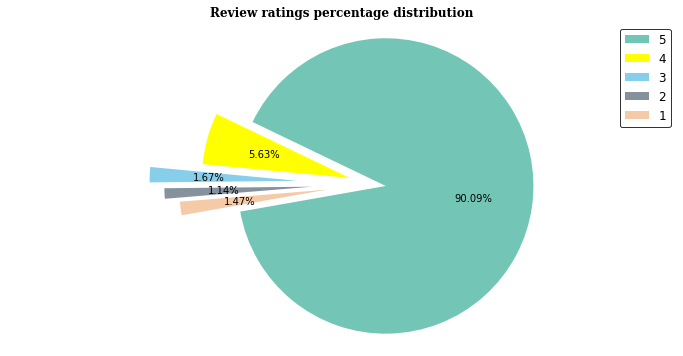

In [32]:
fig, ax = plt.subplots(figsize =(12, 6))
values = data2.rating.value_counts().sort_index(ascending=False)
plt.pie(values, autopct='%0.2f%%', startangle=190, explode=[0.1,0.15,0.5,0.4,0.3],
        colors =['#73C6B6','yellow','skyblue',"#85929E",'#F5CBA7'])
plt.legend(values.index,loc='best',fontsize=12,edgecolor = 'black')
plt.title("Review ratings percentage distribution",size=12, weight='bold', family='serif')
plt.axis('equal');


**Insights :**
- **95.72% reviews are positive**
- **1.67% reviews are neutral**
- **2.61% reviews are negative**

Numbers of Reviews posted across each month 

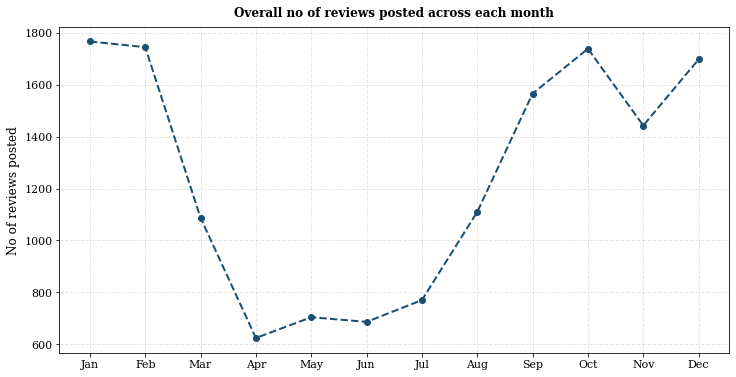

In [33]:
month = data2.groupby(['month'])['date_of_stay'].count()
fig, ax = plt.subplots(figsize =(12, 6))
plt.plot(month.index, month.values, 'o--',linewidth=2,color='#1B4F72');
labels= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.ylabel('No of reviews posted',size=12, family='serif')
plt.title("Overall no of reviews posted across each month", size=12,pad=10, weight='bold', family='serif') 
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(labels)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif');

**Insights :**
- **Most no of reviews were posted in January**
- **Least no of reviews were posted in April**
- **Peak season starts in September and continues till February**
- **The beginning of April until the end of July is the off-season time**

Numbers of Reviews posted throughout the Years


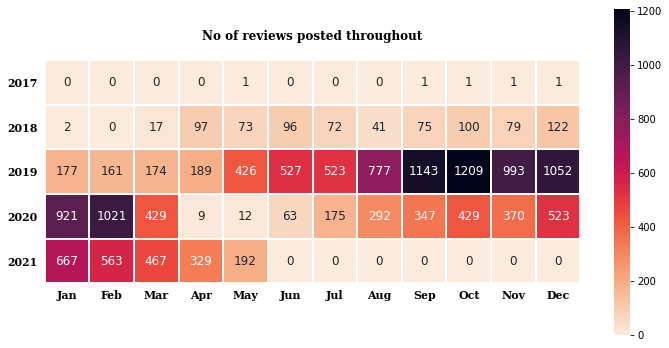

In [34]:
temp = pd.get_dummies(data2.month)
temp['year'] = data2['year']
heatdf = temp.groupby('year').sum()
fig, ax = plt.subplots(figsize =(12, 6))
sns.heatmap(heatdf, fmt="1.0f",annot=True, cmap='rocket_r',annot_kws={'size':12},square=True,linewidths=0.2);
plt.title("No of reviews posted throughout", size=12,pad=20, weight='bold', family='serif') 
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
ax.set_xticklabels(labels)
plt.yticks(size=11, family='serif',rotation =0,weight='bold') 
plt.xticks(size=11, family='serif',weight='bold')
plt.ylabel('')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none');

**Analysis:** - ** The month with the most reviews was October 2019** - ** In March 2020, due to the pandemic scenario and rigorous lockdowns, there was a significant decline in the number of clients visiting the hotels** - ** In April 2020, there were just 9 reviews**.

WordCloud showing title reviews

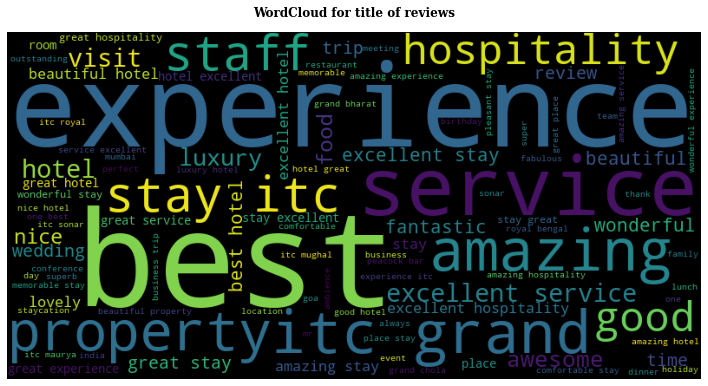

In [35]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 800, height =400, random_state=10,max_words=100).generate(" ".join(data2.review_title))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.title("WordCloud for title of reviews", size=12,pad=15, weight='bold', family='serif') 
plt.axis("off");

- Customers are commenting about their experience, the service they received, the ITC brand, the property, and so on.
- The most frequently used words in review titles are best, service, experience, fantastic, staff, good, and so on.

Histogram showing subjectivity scores

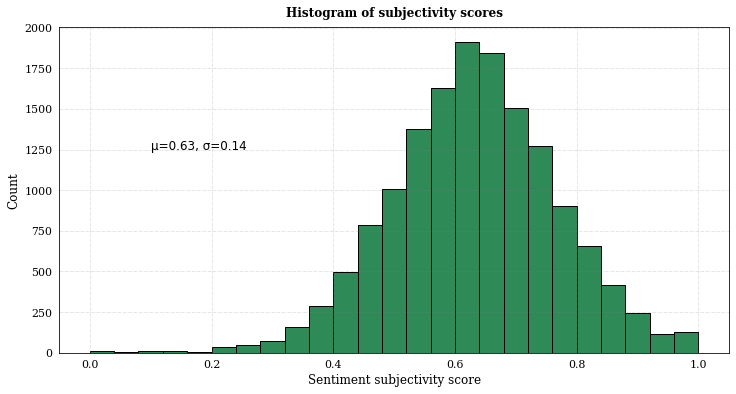

In [36]:
fig, ax = plt.subplots(figsize =(12, 6))
plt.hist(data2.subjectivity,edgecolor='black',bins=25,color='seagreen');
mean = round(data2.subjectivity.mean(),2)
std = round(data2.subjectivity.std(),2)
plt.text(0.1, 1250, 'µ={}, σ={}'.format(mean,std), size=12)
plt.title("Histogram of subjectivity scores", size=12,pad=10, weight='bold', family='serif') 
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.xlabel('Sentiment subjectivity score',size=12, family='serif')
plt.ylabel('Count',size=12, family='serif')
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4);

Insights: - A higher number of evaluations have a subjectivity score of 1 than scores of 0, indicating that personal opinions are presented more than factual information. - The mean subjectivity score is 0.63.

PDF and CDF showing the length of reviews

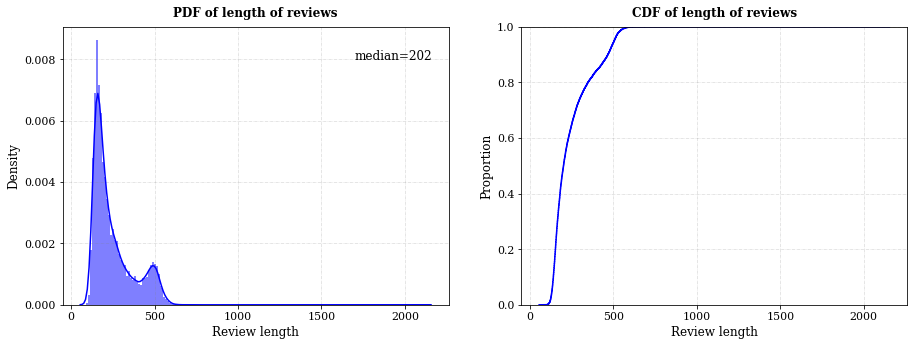

In [37]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.subplot(1, 2, 1)
plt.title("PDF of length of reviews", size=12,pad=10, weight='bold', family='serif') 
sns.histplot(data2.review_length,kde=True, stat="density",linewidth=0, color='blue')
median = round(data2.review_length.median())
plt.text(1700,0.008, 'median={}'.format(median), size=12, family='serif')
plt.ylabel('Density',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Review length',size=12, family='serif')

plt.subplot(1, 2, 2)
plt.tight_layout(pad=5)
plt.title("CDF of length of reviews", size=12,pad=10, weight='bold', family='serif') 
sns.ecdfplot(data2.review_length,color='blue')
plt.ylabel('Proportion',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Review length',size=12, family='serif');

Observations :

The average length of a review is fewer than 500 characters in 94% of cases.
The average length of a review is 202 characters.
The majority of individuals choose to write shorter reviews.

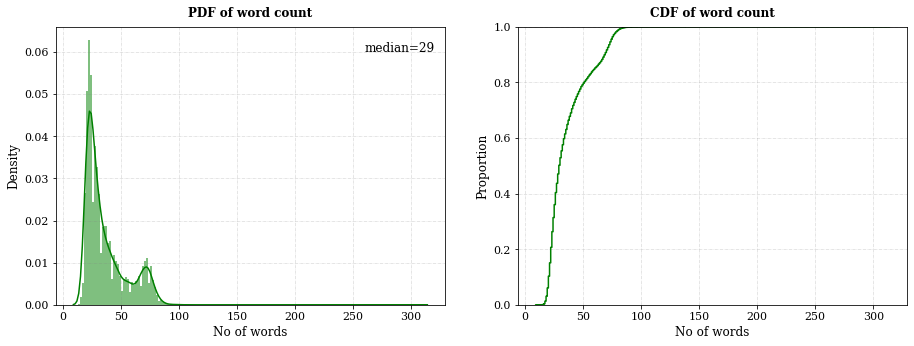

In [38]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.subplot(1, 2, 1)
plt.title("PDF of word count", size=12,pad=10, weight='bold', family='serif') 
sns.histplot(data2.no_of_words,kde=True, stat="density",linewidth=0, color='green')
median = round(data2.no_of_words.median())
plt.text(260,0.06, 'median={}'.format(median), size=12, family='serif')
plt.ylabel('Density',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('No of words',size=12, family='serif')

plt.subplot(1, 2, 2)
plt.tight_layout(pad=5)
plt.title("CDF of word count", size=12,pad=10, weight='bold', family='serif') 
sns.ecdfplot(data2.no_of_words,color='green')
plt.ylabel('Proportion',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('No of words',size=12, family='serif');

**Insights :**
- **80% reviews have word count of less than 50 words**
- **Median word count in a review is 29 words**

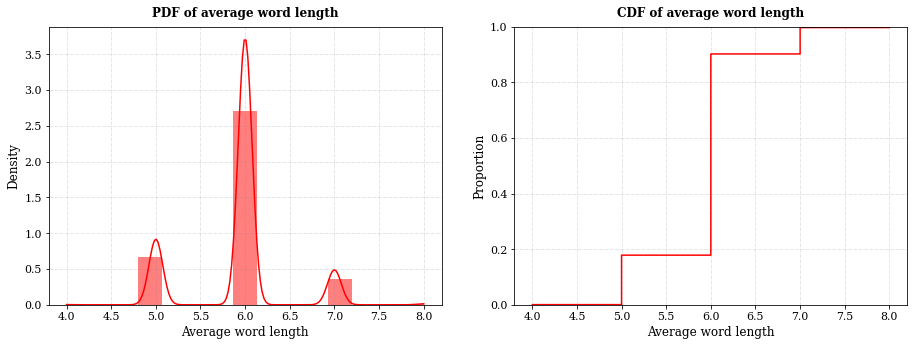

In [39]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.subplot(1, 2, 1)
plt.title("PDF of average word length", size=12,pad=10, weight='bold', family='serif') 
sns.histplot(data2.avg_word_len,kde=True, stat="density",linewidth=0, color='red')
plt.ylabel('Density',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Average word length',size=12, family='serif')

plt.subplot(1, 2, 2)
plt.tight_layout(pad=5)
plt.title("CDF of average word length", size=12,pad=10, weight='bold', family='serif') 
sns.ecdfplot(data2.avg_word_len,color='red')
plt.ylabel('Proportion',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Average word length',size=12, family='serif');

**Insights :**
- **70% reviews have average word length of 6 characters**
- **Average word length of reviews ranges from 4 to 8 characters**

In [40]:
def get_top_ngrams(corpus, n,x): #function to get top n-grams
    text = ','.join(corpus)
    ngram = ngrams(text.split(),n) #Returns the ngrams generated from a sequence of items, as an iterator
    freq = collections.Counter(ngram) #Counter is an unordered collection where elements are stored as Dict keys and their count as dict value
    top10 = freq.most_common(x) #most_common() is used to produce a sequence of the n most frequently encountered input values and their respective counts

    gram,count= [],[]
    for i in top10:
        gram.append(" ".join(i[0]))
        count.append(i[1])
    return pd.DataFrame({'gram':gram,'freq':count})

Analysing Unigram

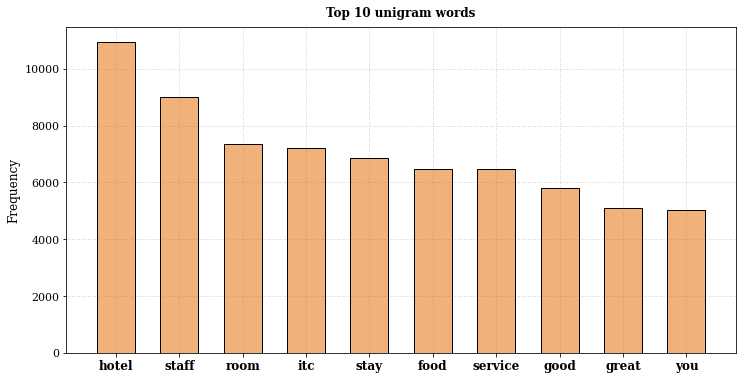

In [41]:
unigram = get_top_ngrams(data2.review_text,1,10)

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(unigram.gram, unigram.freq,width = 0.6,color='#F0B27A',edgecolor='black')
plt.title("Top 10 unigram words", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('Frequency',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=12, family='serif',weight='bold');

Analysing Bigram

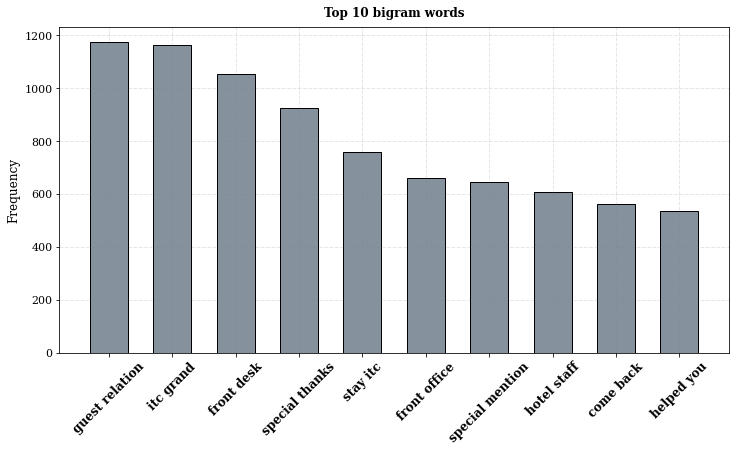

In [42]:
bigram = get_top_ngrams(data2.review_text,2,10)

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(bigram.gram, bigram.freq,width = 0.6,color='#85929E',edgecolor='black')
plt.title("Top 10 bigram words", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('Frequency',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(rotation = 45,size=12, family='serif',weight='bold');

Analysing Trigram

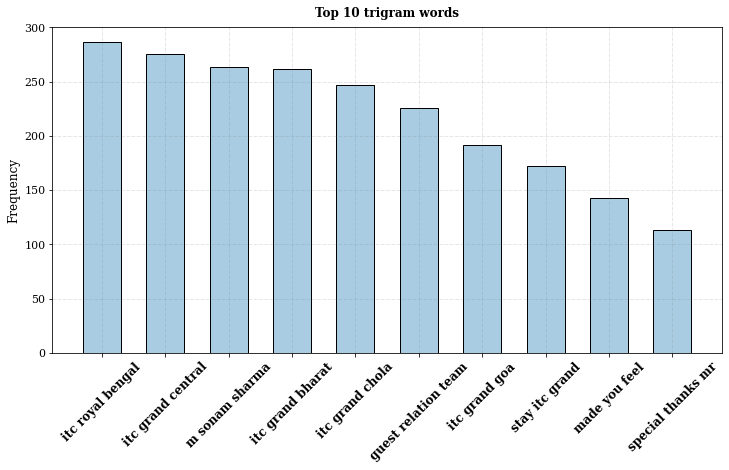

In [43]:
trigram = get_top_ngrams(data2.review_text,3,10)

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(trigram.gram, trigram.freq,width = 0.6,color='#A9CCE3',edgecolor='black')
plt.title("Top 10 trigram words", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('Frequency',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(rotation = 45,size=12, family='serif',weight='bold');

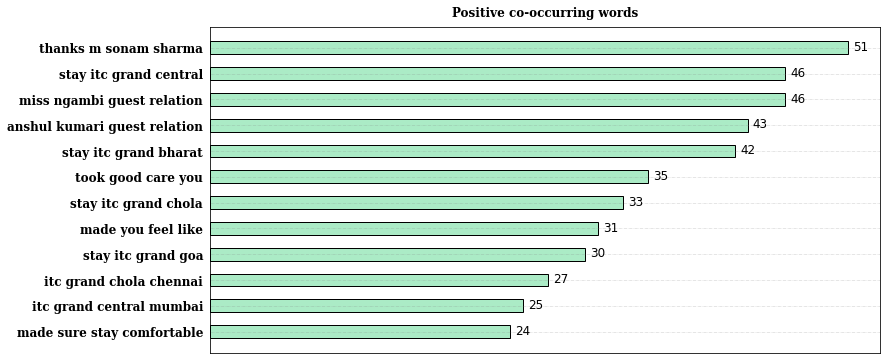

In [44]:
pos = data2[data2.rating > 3] 
pos_grams = get_top_ngrams(pos.review_text,4,12)

fig, ax = plt.subplots(figsize =(12, 6)) 
plt.barh(pos_grams.gram, pos_grams.freq,height = 0.5,color='#ABEBC6',edgecolor='black')
ax.invert_yaxis()
plt.title("Positive co-occurring words", size=12 ,pad=10, weight='bold', family='serif') 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.get_xaxis().set_visible(False) 
plt.yticks(size=12, family='serif',weight='bold') 
for i in ax.patches:  
    plt.text(i.get_width()+0.4, i.get_y()+0.35, i.get_width(), size=12)
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)

Insights: - Hotel staff members like Sonam Sharma, Miss Nambi, and Anshul Kumari are frequently mentioned in excellent reviews, therefore they surely deserve praise**

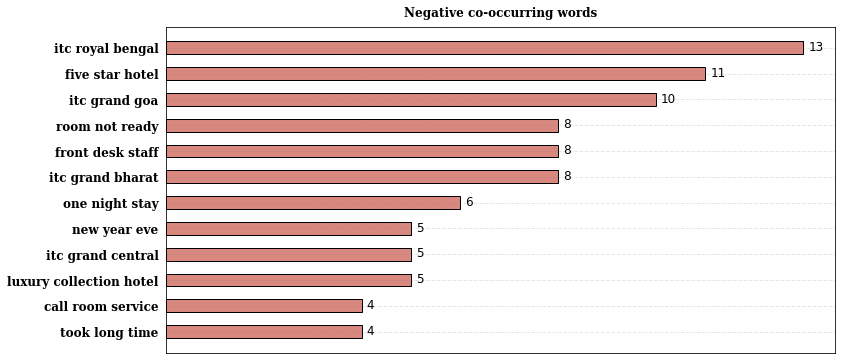

In [45]:
neg = data2[data2.rating <= 3]
neg_grams = get_top_ngrams(neg.review_text,3,12)

fig, ax = plt.subplots(figsize =(12, 6))
plt.barh(neg_grams.gram, neg_grams.freq ,height = 0.5,color='#D98880',edgecolor='black') 
ax.invert_yaxis()
plt.title("Negative co-occurring words", size=12 ,pad=10, weight='bold', family='serif') 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.get_xaxis().set_visible(False) 
plt.yticks(size=12, family='serif',weight='bold') 
for i in ax.patches:  
    plt.text(i.get_width()+0.1, i.get_y()+0.35, i.get_width(), size=12)
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)

**Insights :**
- **In negative reviews, customers are not happy with front desk staff, room service etc.**
- **Also customers are expressing negative emotions about the new year eve celebrations in the hotels**